__Plot frequency domain wavefield__

Daniel Köhn

Kiel, 23.01.2018

__Import Libraries__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

__Load FD wavefield__

In [2]:
minlat = 35.5
maxlat = 58.5

minlon = -14
maxlon = 30

# define longitude and latitude positions of receivers
drec = 0.45   # receiver distance [degree]
lat_rec = np.arange(minlat, maxlat, drec)
lon_rec = np.arange(minlon, maxlon, drec)

lat, lon = np.meshgrid(lat_rec, lon_rec)

# number of grid points in longitude and latitude direction
NH = lat_rec.size
NR = lon_rec.size

name_fd = "DFT_real_MXZ_0.01Hz.bin"
f = open (name_fd)
data_type = np.dtype ('float32').newbyteorder ('<')
fdwave = np.fromfile (f, dtype=data_type)
fdwave = fdwave.reshape(NR,NH)
fdwave = np.transpose(fdwave)
fdwave = np.flipud(fdwave)

clip = np.amax(fdwave)
clip *= 1.5 

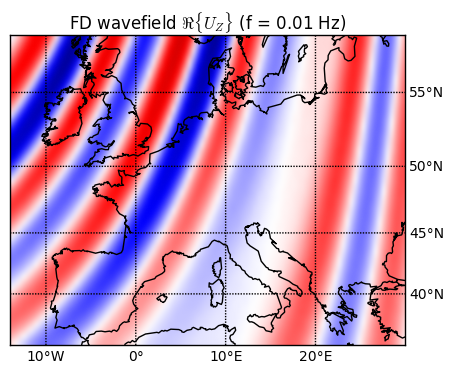

In [3]:
# resolution = 'c' -> low resolution coastlines
# resolution = 'l' -> high resolution coastlines
map = Basemap(projection = 'merc', llcrnrlat=minlat, urcrnrlat=maxlat,
        llcrnrlon=minlon, urcrnrlon=maxlon, resolution='l')

map.drawcoastlines()
map.drawparallels(np.arange(35,60,5.),labels=[0,1,0,0])
map.drawmeridians(np.arange(-10,30,10.),labels=[0,0,0,1])

map.imshow(fdwave,interpolation='bicubic',cmap='seismic',vmin=-clip,vmax=clip,aspect=1)

plt.title(r"FD wavefield $\Re\{U_Z\}$ (f = 0.01 Hz)")

plt.savefig('DFT_real_uz_0.01Hz.pdf', bbox_inches='tight', format='pdf')
plt.show()